# Supervised & Unsupervised Learning ve PCA

## Tekrar

### Gözetimli (Supervised) ve Gözetimsiz (Unsupervised) Öğrenme
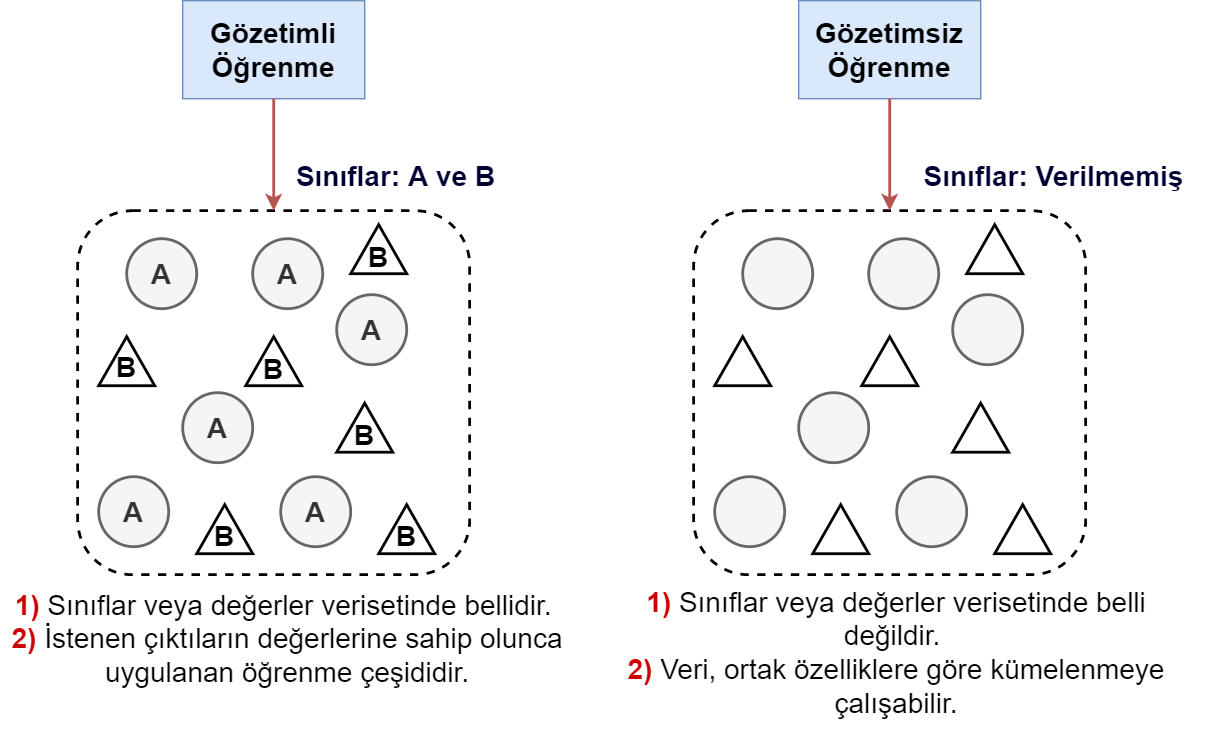

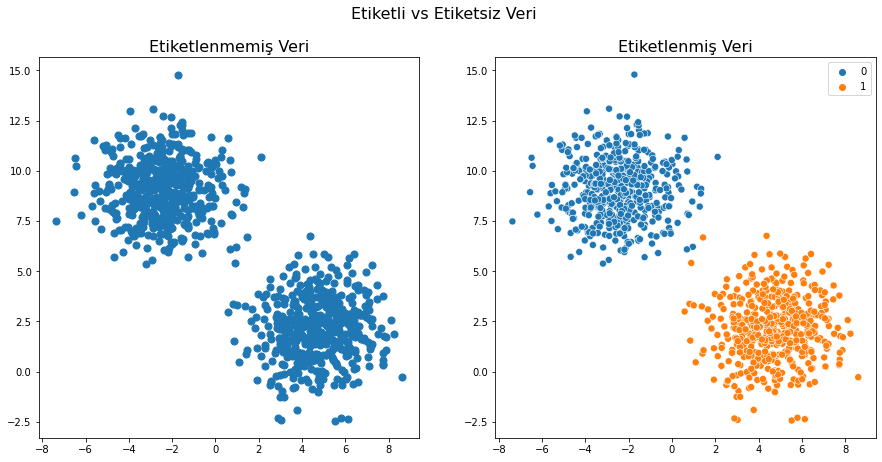

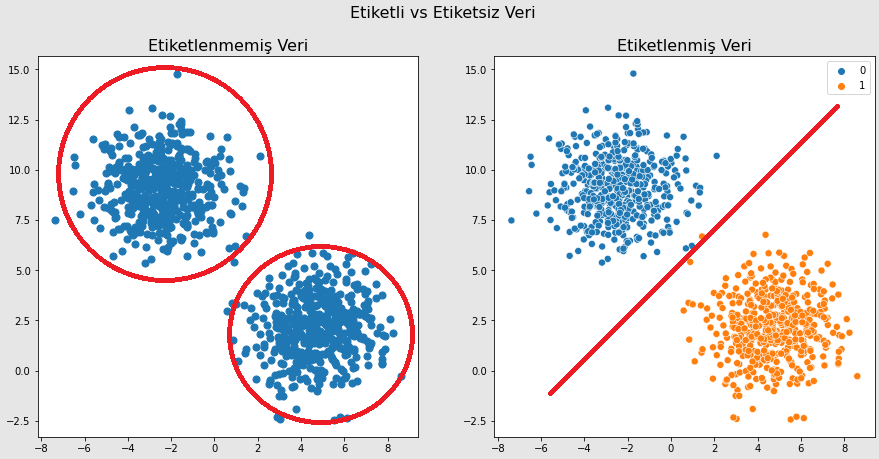

## Lojistik Regresyon

#### x1, x2 ve xn verisetinde bulunan özelliklerdir
#### Her biri kendine ait weight değeri ile çarpılır.
#### Tüm özelliklerin çarpılmış değeri en son toplanır.

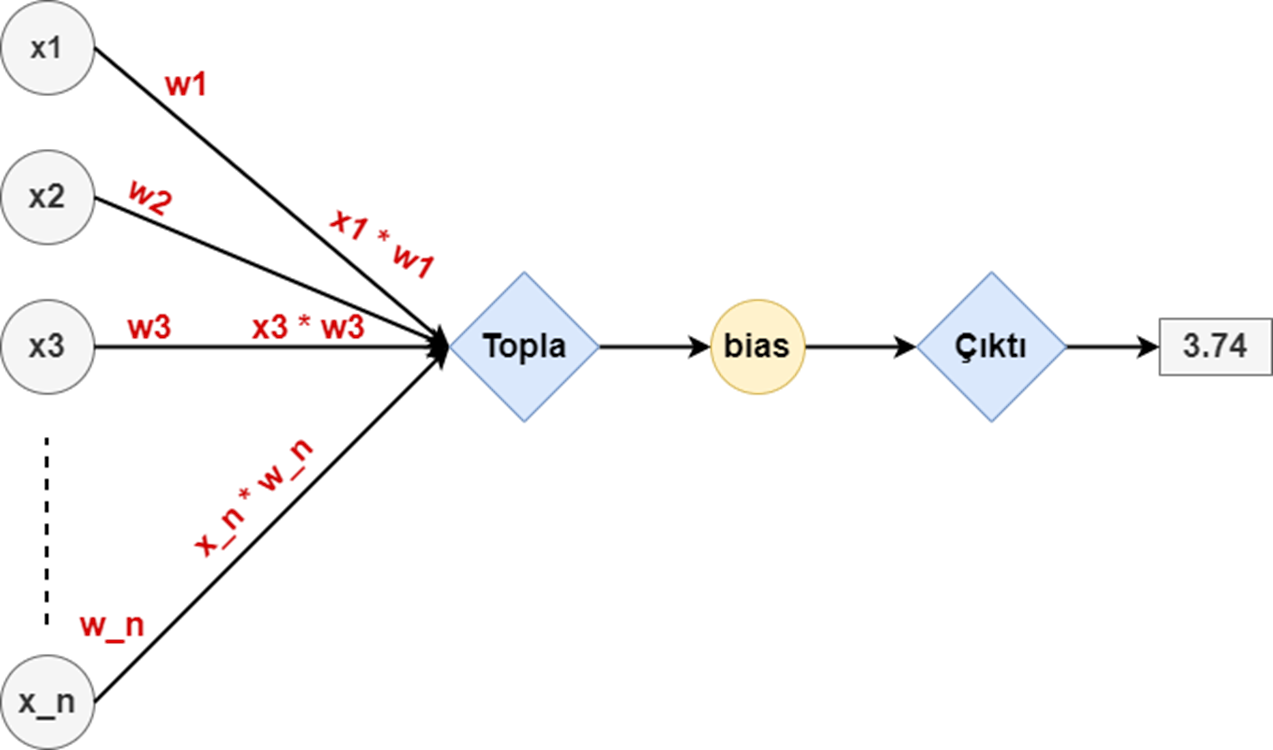

Sınıf seçimi bir eşik değerine göre yapılır, 0.5 yaygın bir seçimdir.

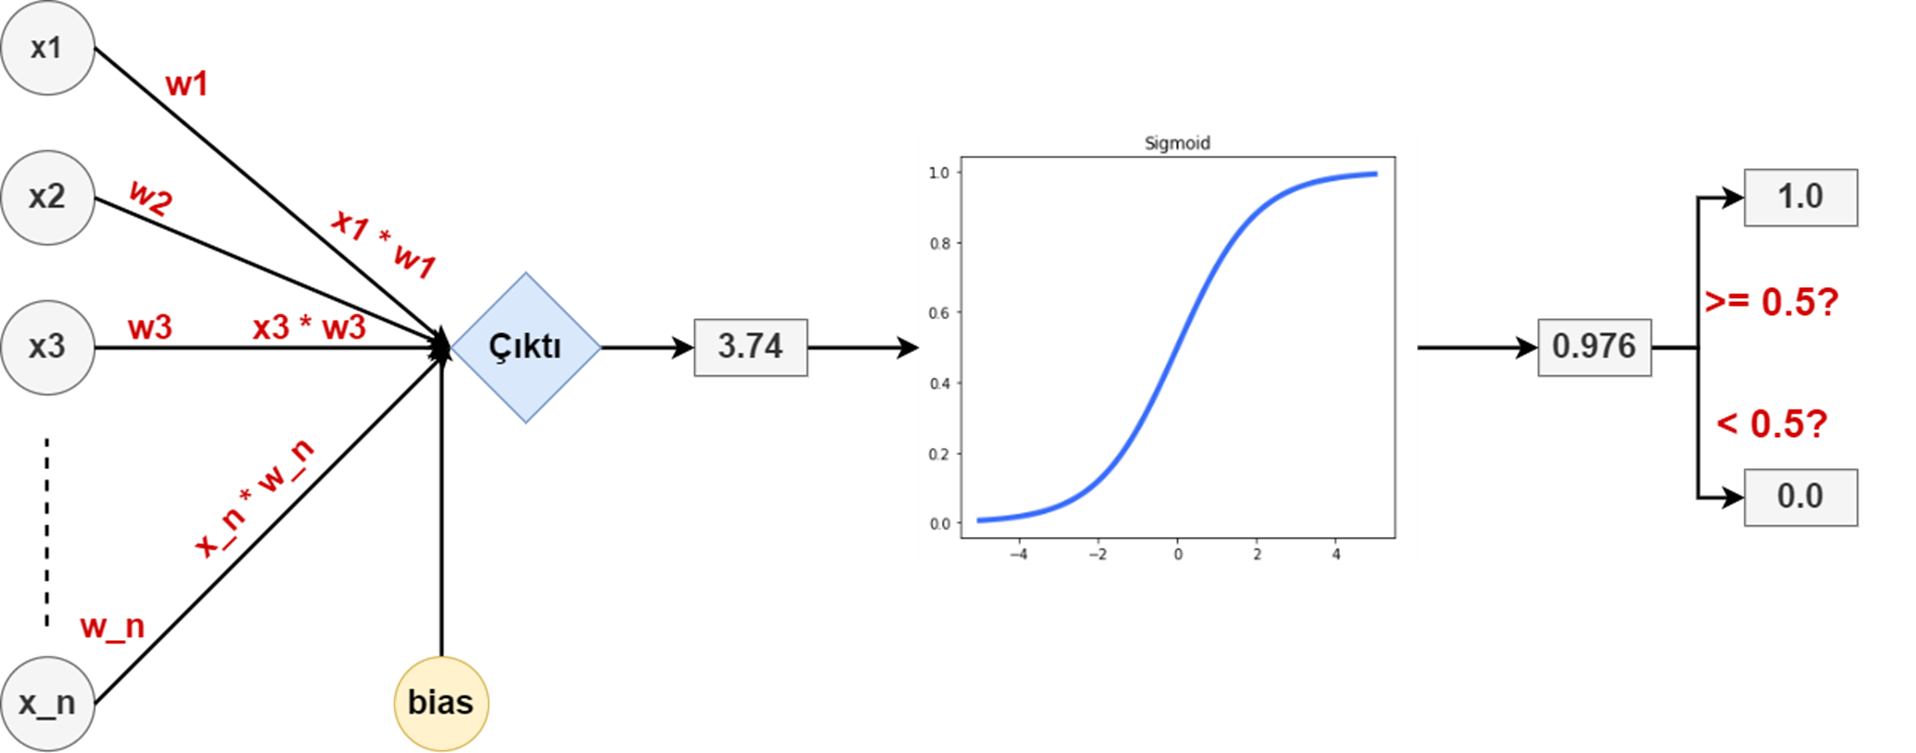

## Gözetimsiz Öğrenme

**Gözetimsiz Öğrenme**, verilerin etiketlenmediği ve bunun yerine yalnızca girdi özellikleriyle tanımlandığı bir makine öğrenimi yöntemidir. Denetimsiz öğrenmenin amacı, verilerdeki gizli kalıpları veya yapıları bulmaktır. Bu genellikle veri noktalarının gruplar halinde kümelenmesiyle yapılır.

Gözetimsiz öğrenmeyi, 3 başlığa ayırabiliriz.

**1. Kümeleme (Clustering):** Müşteri segmentasyonu, denetimsiz öğrenmede kümelemenin başlıca örneğidir. İşletmeler, benzer özelliklere sahip müşterileri bir araya getirerek, belirli pazarlama ve ürün girişimlerini farklı segmentlere daha etkin bir şekilde hedefleyebilir.
 * K-Means ile müşterileri benzer özelliklerine göre kümeleme. (Yaş - Eğitim vb.)
 
 <br>


**2. Boyut Düşürme (Dimensionality Reduction):** Boyutluluk azaltma, mümkün olduğu kadar çok bilgiyi korurken bir veri kümesindeki özniteliklerin sayısını azaltmak için kullanılan bir tekniktir. Bu, verileri daha düşük boyutlu uzayda görselleştirmek veya daha verimli makine öğrenimi modelleri oluşturmak için faydalı olabilir.
 * Örnek olarak PCA, T-SNE ve U-MAP verilebilir.

 <br>

**3. Üretken modeller (Generative Models):** Üretken modeller, bir eğitim veri kümesinden yeni veri örnekleri oluşturmak için kullanılan bir tür denetimsiz öğrenme algoritmasıdır. Bu modeller genellikle belirli bir girdiden yeni görüntüler veya metinler oluşturmak için kullanılır.
 * Örnek olarak GAN, Variational-Autoencoder.

### Adım Adım K-Means

#### Veriye Göz Atış
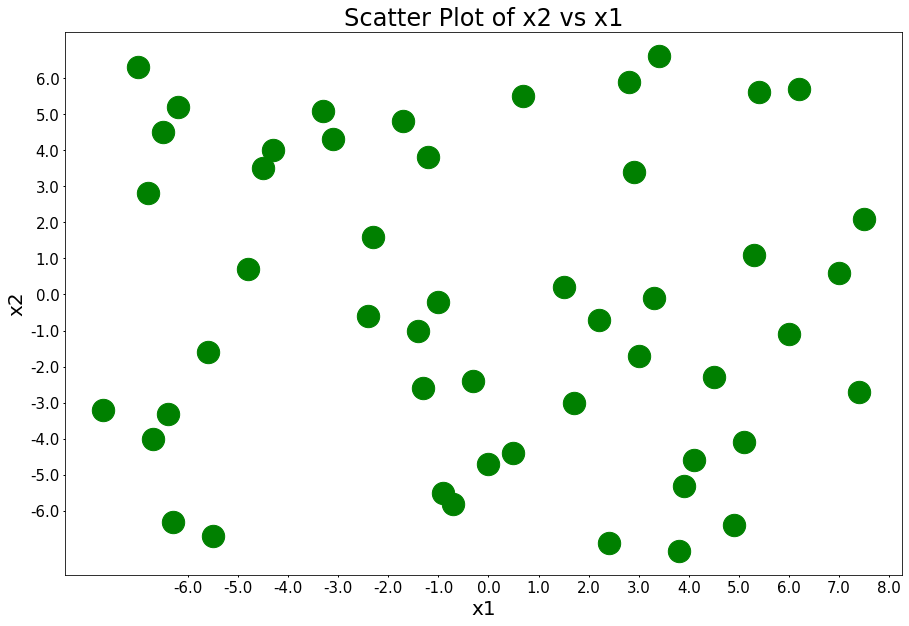

#### Rastgele Küme Merkezleri Oluştur
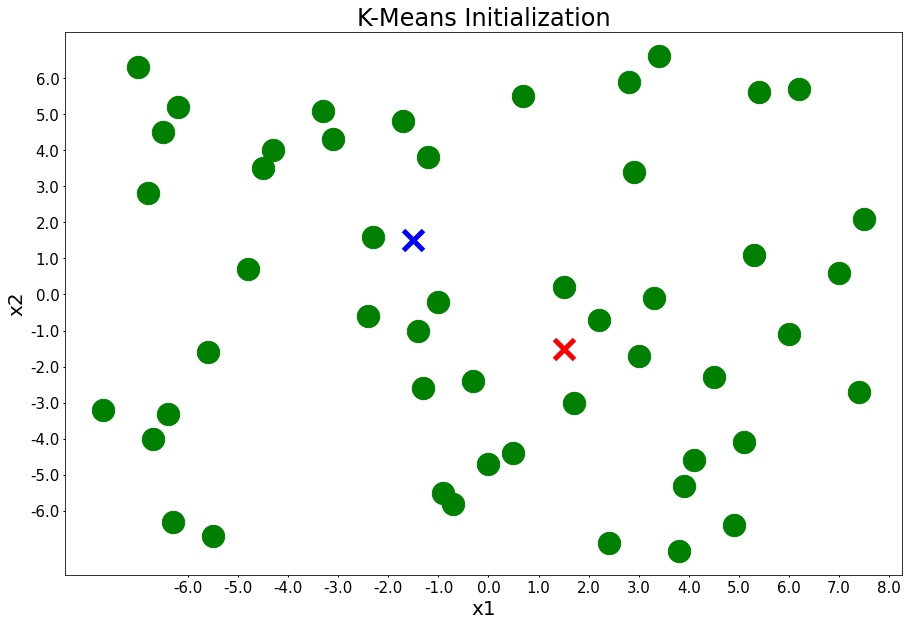

#### Kümelerin Noktalarına Olan Uzaklığına Bak
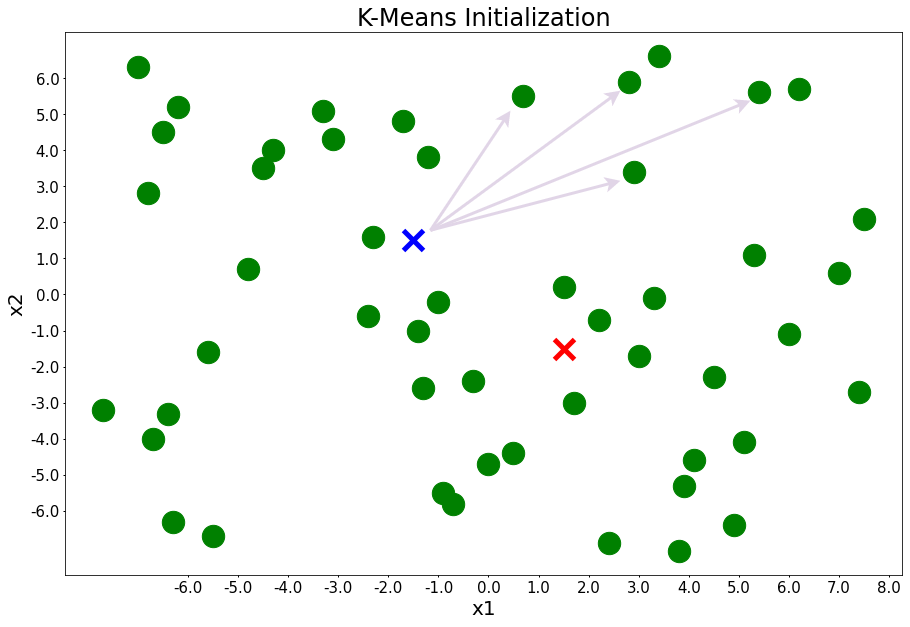

#### Küme Ataması Yapılır
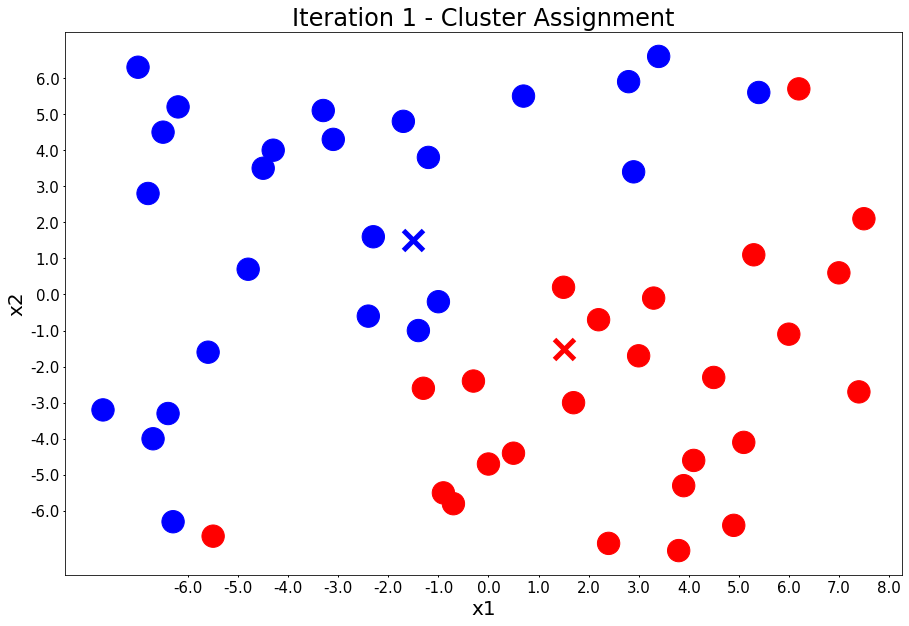

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.normal(size = (100, 2)), columns = ['x1', 'x2'])
df['label'] = np.random.randint(low = 0, high = 2, size = (100, 1))
df

x1        x2  label
0   0.846312  0.398004      0
1   0.378268 -1.655426      1
2  -1.884459 -1.338716      0
3   1.434764 -0.240109      1
4  -0.232452 -0.745853      1
..       ...       ...    ...
95 -1.022395  0.487593      0
96  1.202844 -0.214168      1
97  1.370744  1.889125      0
98  1.342898  1.437480      0
99 -0.626457  0.933919      0

[100 rows x 3 columns]

In [2]:
lab1_df = df[df['label'] == 1]
lab1_df

x1        x2  label
1   0.378268 -1.655426      1
3   1.434764 -0.240109      1
4  -0.232452 -0.745853      1
6  -0.888676 -0.975281      1
7  -0.868447 -0.340939      1
9  -1.437463 -1.787920      1
10  0.343180  1.024634      1
12  0.701018 -0.778984      1
19 -1.918481  1.237419      1
24  1.111286  1.080945      1
28 -0.675211 -1.148122      1
29  0.005140  0.053736      1
31 -0.014847 -1.482959      1
33 -1.422949 -0.766924      1
35 -1.416296 -1.575344      1
38 -1.184838 -0.696695      1
41  0.299985  1.685400      1
43 -0.771318 -0.255347      1
44 -1.362940 -1.567481      1
45  1.038138  0.985226      1
47 -0.253052  0.544157      1
49  1.081336  0.756716      1
50  0.390606  1.125638      1
54 -0.331433 -1.113080      1
56  0.379480 -0.315388      1
57 -0.784417  0.921999      1
59 -0.833757  1.286058      1
61 -0.360115  0.373236      1
62  1.756568 -1.271180      1
64  0.320308 -1.224299      1
65 -0.890451 -0.470882      1
67 -0.104007 -0.061366      1
68 -1.418147 -0.417066      1
70 -0.094395  0.430700      1
72  0.513983 -0.863602      1
73  1.554919  1.722141      1
75 -0.297592  1.359647      1
76  0.613865 -2.165543      1
77 -0.504093 -1.534516      1
78  1.458252  0.602243      1
79  0.590641  0.138989      1
80  2.495958 -1.905329      1
82  1.660347  1.997909      1
83 -0.068765 -1.057267      1
84 -0.919734 -1.186907      1
89 -0.024220  0.949041      1
90 -0.288993  0.163677      1
96  1.202844 -0.214168      1

In [3]:
# Eski centroid koordinatları (0.03, 0.07) olsun.
# Yeni koordinatlar = x1.mean, x2.mean
lab1_df.mean()

x1      -0.000754
x2      -0.195385
label    1.000000
dtype: float64

#### Küme Merkezleri Güncellenir
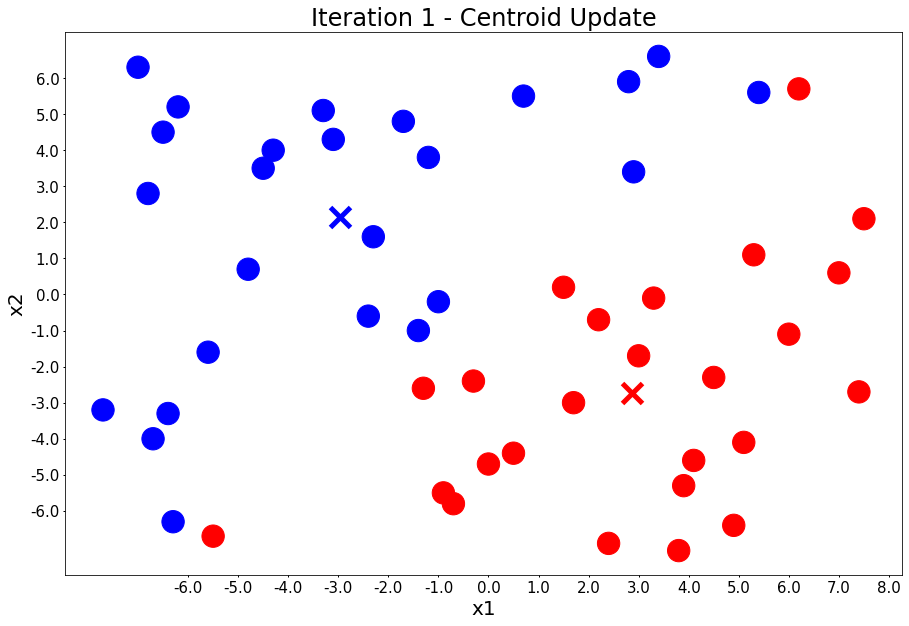

#### Mevcut Küme Merkezlerine Göre Kümeler Yeniden Belirlenir
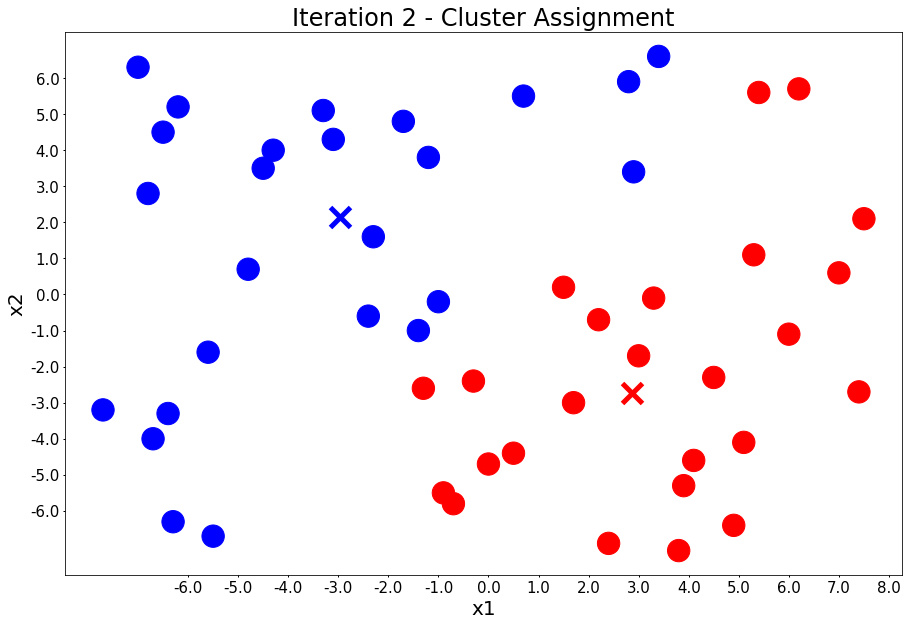

#### Küme Güncelleştirme .. Olana Kadar Devam Eder
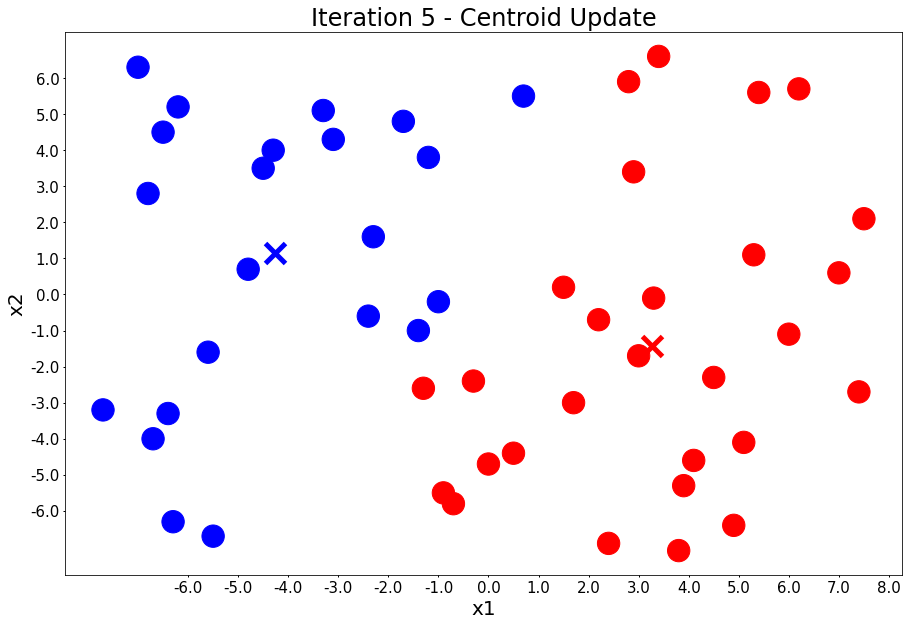

#### K-Means GIF:
* (by Ruslan Brilenkov, Understanding K-Means Clustering: Hands-on Visual Approach)

<img src="kmeans.gif" width="750" align="center">

#### K değeri nasıl seçilir?
Bunun için `elbow` yöntemi kullanılabilir.
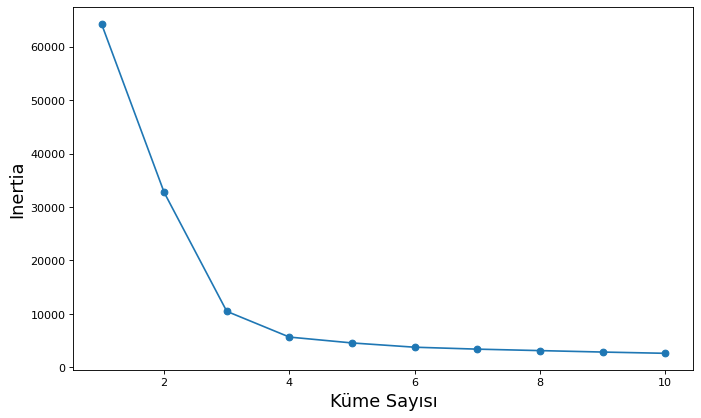

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, \
                            recall_score, precision_score, \
                            classification_report

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

from collections import Counter

from plotly.offline import iplot
import plotly.graph_objs as go

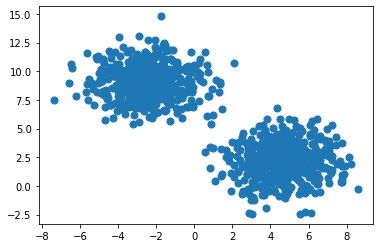

In [5]:
# Generate blobs
X, _ = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42,
                  cluster_std=1.5)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='autumn')
plt.show()

In [6]:
def fit_and_plot_kmeans(num_clusters, data):
    """
    Bu fonksiyon veriyi alıp K-Means fit eder. Sonuçları scatterplot üzerinde basar.
    num_clusters: Küme sayısı
    data: Kümelenecek veri
    """
    kMeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kMeans.fit(data)

    # Plot the data
    plt.scatter(data[:, 0], data[:, 1], 
                c=kMeans.labels_, s=50, cmap='autumn')
    
    plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1],
                c='black', s=200, alpha=0.8)
    plt.show()

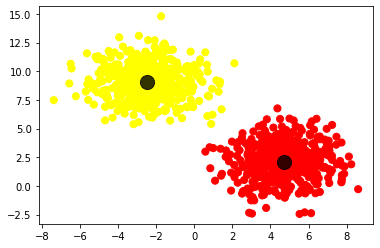

In [7]:
# Sklearn K-Means ile veriyi kümeleme.
fit_and_plot_kmeans(num_clusters=2,
                    data = X)

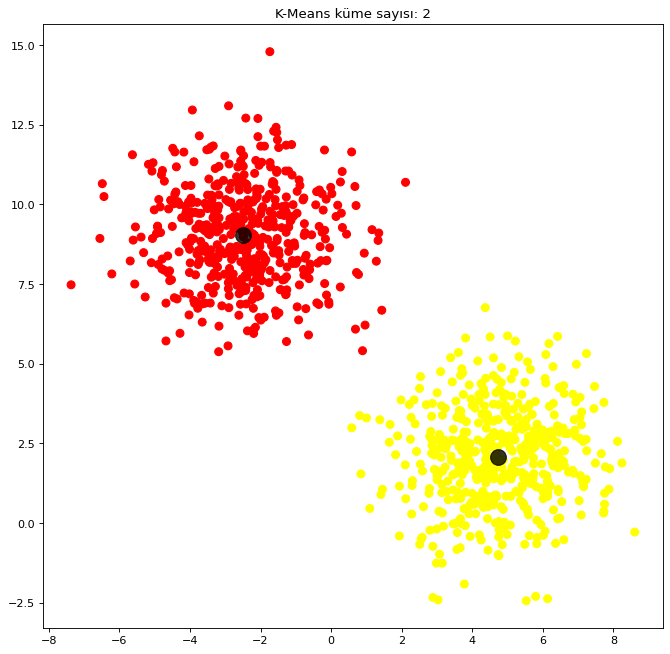

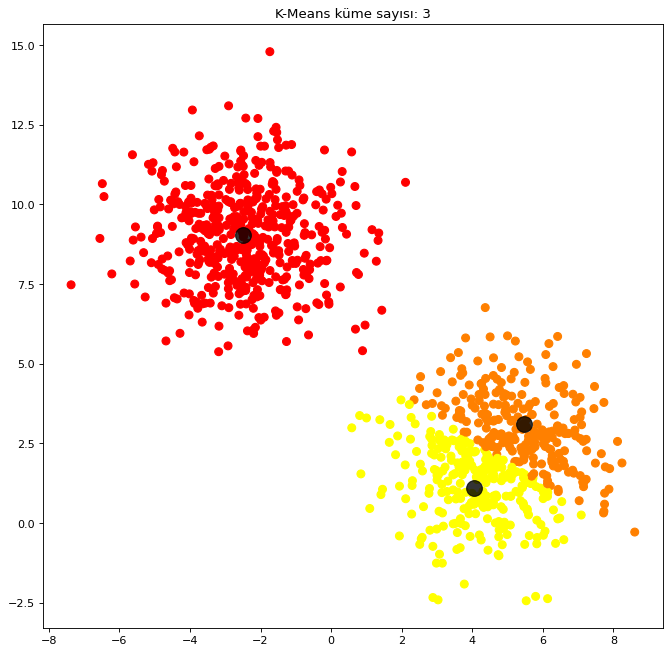

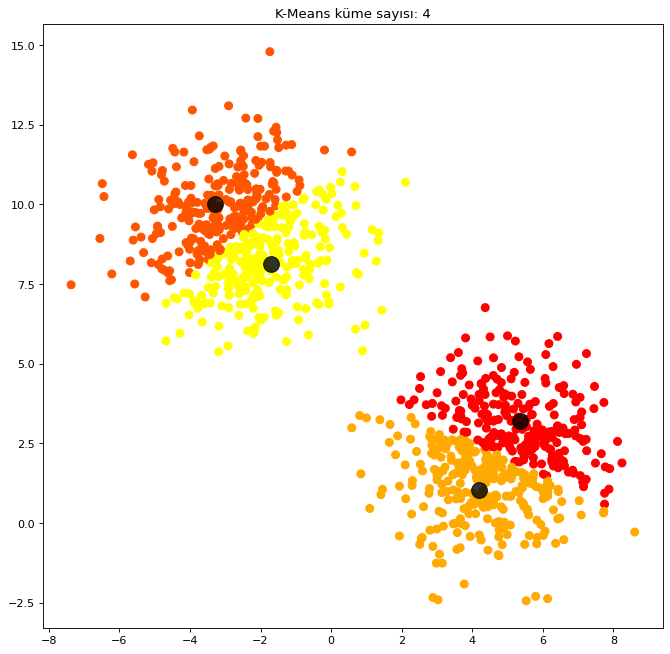

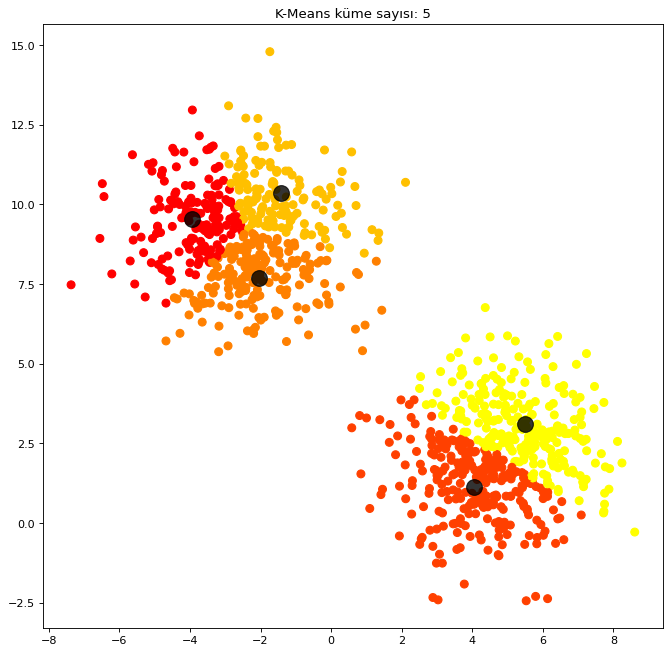

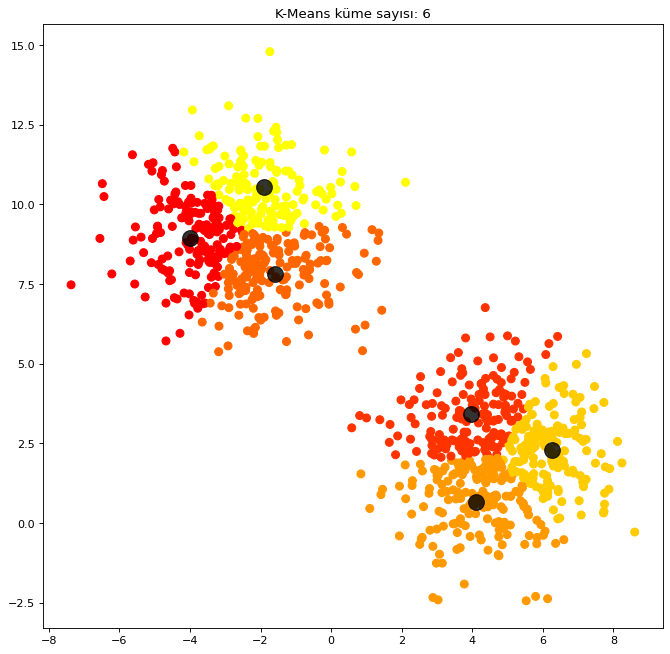

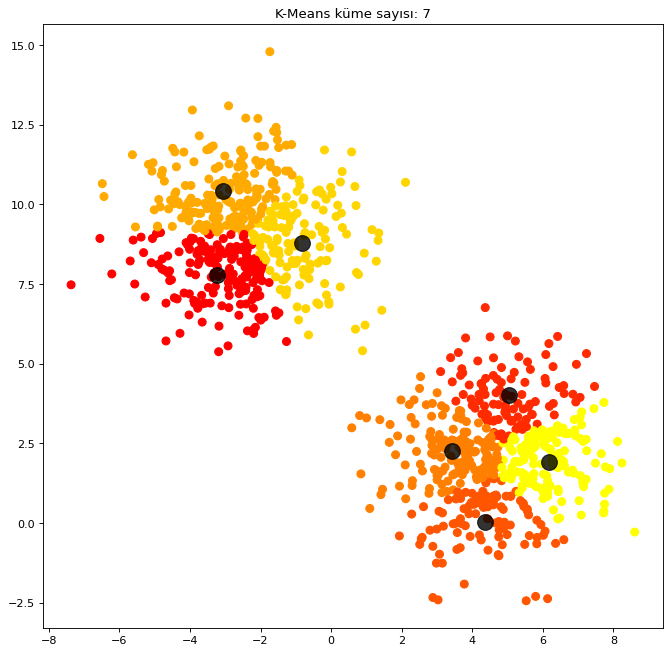

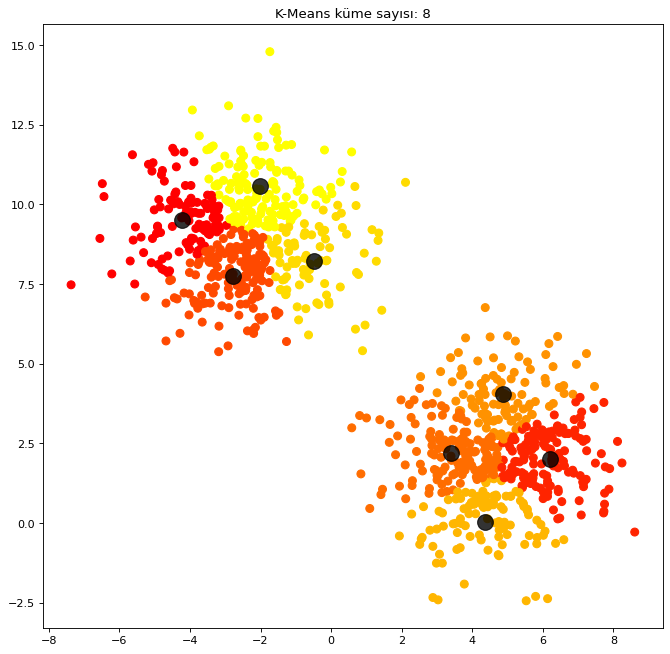

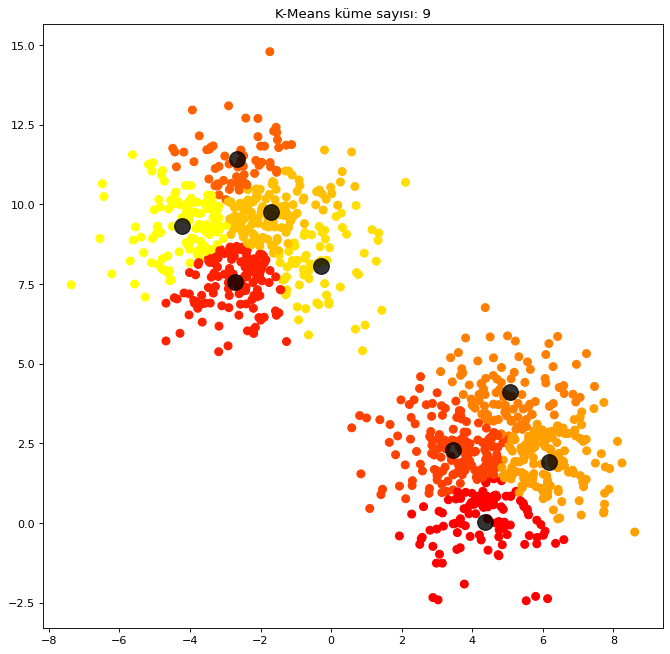

In [8]:
# Farklı küme sayısı ile K-Means kullanıp sonuçları görselleştir.
for n_clusters in range(2, 10):
    plt.figure(figsize=(10,10), dpi=80)
    plt.title('K-Means küme sayısı: {}'.format(n_clusters))
    fit_and_plot_kmeans(num_clusters=n_clusters,
                        data = X)

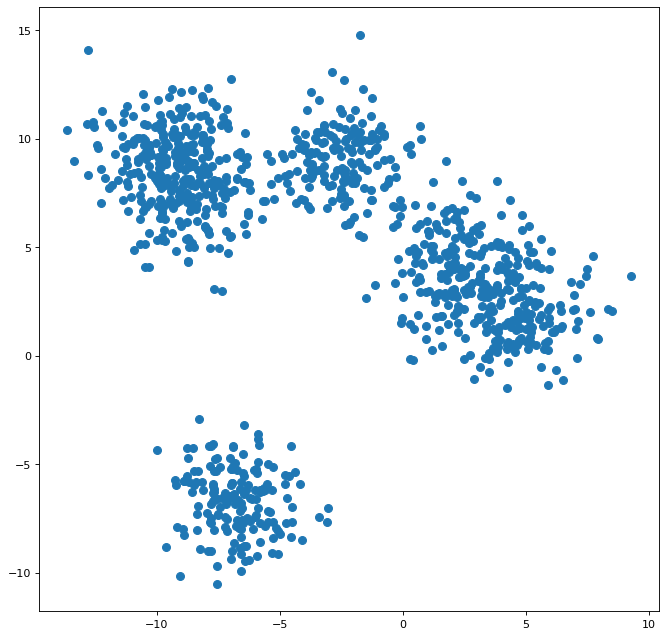

In [9]:
# Birden fazla küme olacak şekilde veri oluşturalım.
X, _ = make_blobs(n_samples=1000, n_features=2, centers=6, random_state=42,
                  cluster_std=1.5)
# Plot the data
plt.figure(figsize=(10,10), dpi=80)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='autumn')
plt.show()

In [10]:
def plot_elbow_method(data):
    # Uygun küme sayısını bulmak için Elbow yöntemi kullanalım.
    inertia = [] # Örneklerin bulunduğu kümenin merkezine olan uzaklıklarının toplamı.
    for i in range(1, 15):
        kMeans = KMeans(n_clusters=i, random_state=42)
        kMeans.fit(data)
        inertia.append(kMeans.inertia_)

    # Plot the inertia
    plt.figure(figsize=(10,6), dpi=80)
    plt.plot(range(1, 15), inertia, marker='o')
    plt.xlabel('Küme Sayısı', fontsize = 16)
    plt.ylabel('Inertia', fontsize = 16)
    plt.show()    

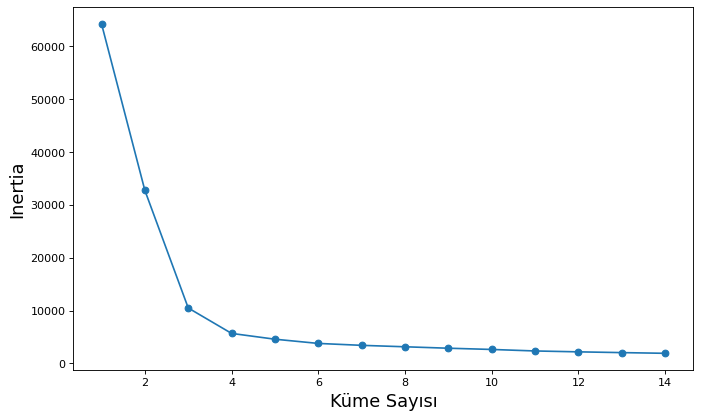

In [11]:
plot_elbow_method(X)

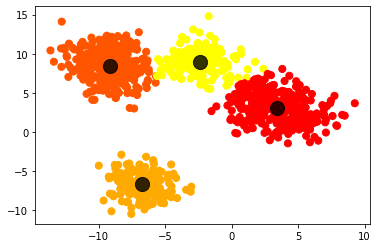

In [12]:
# K-Means ile kümeleme yapalım.
fit_and_plot_kmeans(num_clusters=4,
                    data = X)

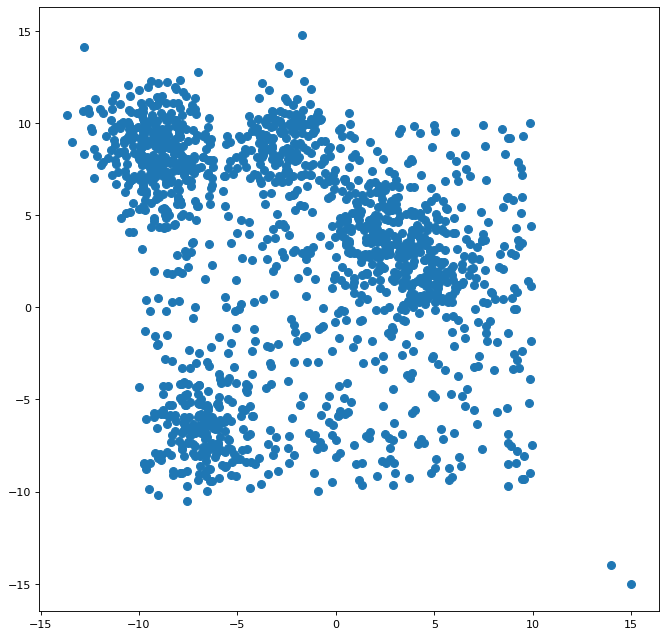

In [13]:
# Generate blobs
X, _ = make_blobs(n_samples=1000, n_features=2, centers=6, random_state=42,
                  cluster_std=1.5)

# Aykırı değer ekleyerek veriyi bozmaya çalışalım.
random_fraction = 0.5
randoms = np.random.uniform(low=-10, high=10, size=(int(random_fraction * X.shape[0]), X.shape[1]))
X = np.r_[X, randoms]

X_outliers = np.r_[X, [[15, -15], [14, -14]]]

# Plot the data
plt.figure(figsize=(10,10), dpi=80)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=50, cmap='autumn')
plt.show()

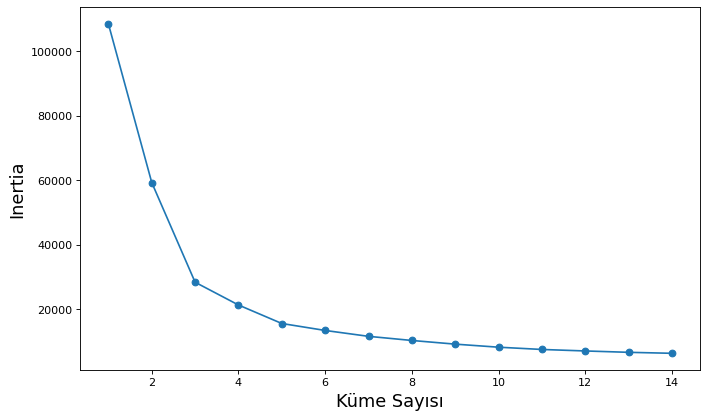

In [14]:
plot_elbow_method(X_outliers)

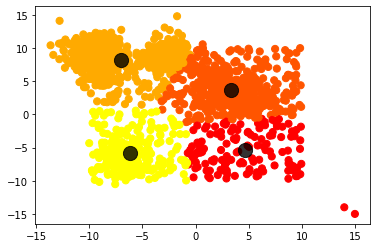

In [15]:
# Get the elbow value
fit_and_plot_kmeans(num_clusters=4,
                    data = X_outliers)

## Gerçek Veride K-Means

In [16]:
data = pd.read_csv("musteri_segmentasyonu.csv")
data.dropna(inplace = True)
data.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

In [17]:
data.describe().T

count        mean         std     min        25%       50%  \
Customer Id      700.0  430.461429  243.323524   1.000  222.75000  433.5000   
Age              700.0   34.860000    7.997342  20.000   29.00000   34.0000   
Edu              700.0    1.722857    0.928206   1.000    1.00000    1.0000   
Years Employed   700.0    8.388571    6.658039   0.000    3.00000    7.0000   
Income           700.0   45.601429   36.814226  14.000   24.00000   34.0000   
Card Debt        700.0    1.553566    2.117196   0.012    0.36875    0.8550   
Other Debt       700.0    3.058196    3.287550   0.046    1.04400    1.9875   
Defaulted        700.0    0.261429    0.439727   0.000    0.00000    0.0000   
DebtIncomeRatio  700.0   10.260571    6.827234   0.400    5.00000    8.6000   

                       75%      max  
Customer Id      642.25000  850.000  
Age               40.00000   56.000  
Edu                2.00000    5.000  
Years Employed    12.00000   31.000  
Income            55.00000  446.000  
Card Debt          1.90175   20.561  
Other Debt         3.92325   27.034  
Defaulted          1.00000    1.000  
DebtIncomeRatio   14.12500   41.300

In [18]:
data = data.drop(['Address', 'Customer Id'], axis=1)
data.head()

Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0   41    2               6      19      0.124       1.073        0.0   
1   47    1              26     100      4.582       8.218        0.0   
2   33    2              10      57      6.111       5.802        1.0   
3   29    2               4      19      0.681       0.516        0.0   
4   47    1              31     253      9.308       8.908        0.0   

   DebtIncomeRatio  
0              6.3  
1             12.8  
2             20.9  
3              6.3  
4              7.2

In [19]:
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
data_normalized

Age   Edu  Years Employed    Income  Card Debt  Other Debt  \
0    0.583333  0.25        0.193548  0.011574   0.005450    0.038054   
1    0.750000  0.00        0.838710  0.199074   0.222395    0.302801   
2    0.361111  0.25        0.322581  0.099537   0.296803    0.213280   
3    0.250000  0.25        0.129032  0.011574   0.032556    0.017415   
4    0.750000  0.00        1.000000  0.553241   0.452382    0.328368   
..        ...   ...             ...       ...        ...         ...   
844  0.583333  0.00        0.225806  0.067130   0.033189    0.042686   
846  0.222222  0.25        0.225806  0.046296   0.016886    0.073181   
847  0.138889  0.75        0.000000  0.009259   0.135773    0.117237   
848  0.333333  0.00        0.387097  0.032407   0.005061    0.024085   
849  0.888889  0.00        0.516129  0.115741   0.090223    0.133096   

     Defaulted  DebtIncomeRatio  
0          0.0         0.144254  
1          0.0         0.303178  
2          1.0         0.501222  
3          0.0         0.144254  
4          0.0         0.166259  
..         ...              ...  
844        0.0         0.097800  
846        0.0         0.161369  
847        1.0         0.806846  
848        0.0         0.061125  
849        0.0         0.200489  

[700 rows x 8 columns]

In [20]:
data_normalized.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

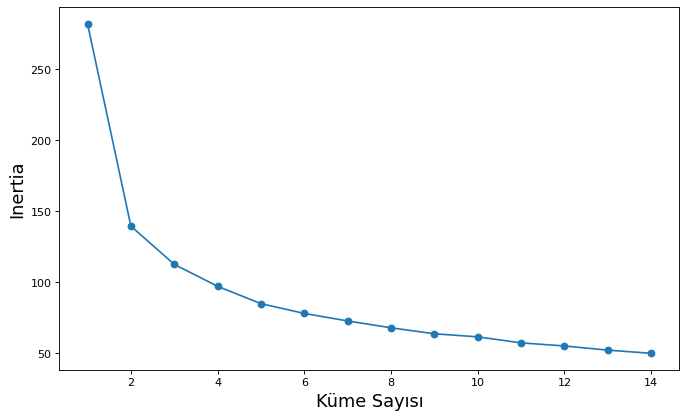

In [21]:
plot_elbow_method(data_normalized)

In [22]:
clusterNum = 3
k_means_n = KMeans(n_clusters = 3)
k_means_n.fit(data_normalized)
labels = k_means_n.labels_
print(labels[:4])

[0 2 1 0]


In [23]:
data['cluster_num'] = k_means_n.labels_
data

Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0     41    2               6      19      0.124       1.073        0.0   
1     47    1              26     100      4.582       8.218        0.0   
2     33    2              10      57      6.111       5.802        1.0   
3     29    2               4      19      0.681       0.516        0.0   
4     47    1              31     253      9.308       8.908        0.0   
..   ...  ...             ...     ...        ...         ...        ...   
844   41    1               7      43      0.694       1.198        0.0   
846   28    2               7      34      0.359       2.021        0.0   
847   25    4               0      18      2.802       3.210        1.0   
848   32    1              12      28      0.116       0.696        0.0   
849   52    1              16      64      1.866       3.638        0.0   

     DebtIncomeRatio  cluster_num  
0                6.3            0  
1               12.8            2  
2               20.9            1  
3                6.3            0  
4                7.2            2  
..               ...          ...  
844              4.4            0  
846              7.0            0  
847             33.4            1  
848              2.9            0  
849              8.6            2  

[700 rows x 9 columns]

In [24]:
data.groupby('cluster_num').describe()

Age                                                       Edu  \
             count       mean       std   min   25%   50%   75%   max  count   
cluster_num                                                                    
0            316.0  31.376582  5.806451  20.0  27.0  31.0  35.0  48.0  316.0   
1            183.0  33.010929  8.517589  20.0  27.0  31.0  39.0  55.0  183.0   
2            201.0  42.019900  5.530787  30.0  38.0  41.0  46.0  56.0  201.0   

                       ... Defaulted      DebtIncomeRatio             \
                 mean  ...       75%  max           count       mean   
cluster_num            ...                                             
0            1.661392  ...       0.0  0.0           316.0   8.191139   
1            1.901639  ...       1.0  1.0           183.0  14.727869   
2            1.656716  ...       0.0  0.0           201.0   9.446766   

                                                       
                  std  min   25%    50%     75%   max  
cluster_num                                            
0            5.254137  0.6  4.50   6.85  10.725  26.0  
1            7.902798  0.9  8.55  13.80  19.350  41.3  
2            6.074595  0.4  4.70   8.00  13.200  32.5  

[3 rows x 64 columns]

## Sklearn ile Lojistik Regresyon

In [25]:
def create_dataset(n_samples=1000,
                   n_features=2,
                   n_informative=2,
                   scale = 2.0,
                   shift=1.5,
                   is_imbalance=False):
    """
    Bu fonksiyon verilen parametrelere göre bir sınıflandırma verisi oluşturur.
    :param n_samples: Kaç tane örnek üretileceği.
    :param n_features: Kaç tane özellik olacağı
    :param n_informative: Özelliklerden kaç tanesinin sınıflandırmada etkin rol oynayacağı
    :param scale: Özelliklerle çarpılacak skalar sayı
    :param shift: Özelliklere eklenecek skalar sayı
    :return: 
    """
    if is_imbalance:
        X, y = make_classification(n_samples=n_samples,
                                   n_features=n_features,
                                   n_informative=n_informative,
                                   n_redundant=0,
                                   n_repeated=0,
                                   n_classes=2,
                                   scale=scale,
                                   shift=shift,
                                   weights=[0.99, 0.01],
                                   random_state=42)
    else:
        X, y = make_classification(n_samples=n_samples,
                                   n_features=n_features,
                                   n_informative=n_informative,
                                   n_redundant=0,
                                   n_repeated=0,
                                   n_classes=2,
                                   scale=scale,
                                   shift=shift,
                                   random_state=42)
    return X, y

In [26]:
x, y = create_dataset()
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df

x1        x2  y
0    1.001796  1.672280  1
1    5.493372  5.307194  1
2    4.925554  4.718795  1
3   -2.914882  7.067291  1
4    5.282331  5.118897  1
..        ...       ... ..
995  2.134453  4.781861  0
996  5.040876  5.329234  1
997  2.797465 -0.180351  0
998  4.287522  1.438923  0
999  4.397060  0.441191  0

[1000 rows x 3 columns]

In [27]:
df.y.value_counts()

1    502
0    498
Name: y, dtype: int64

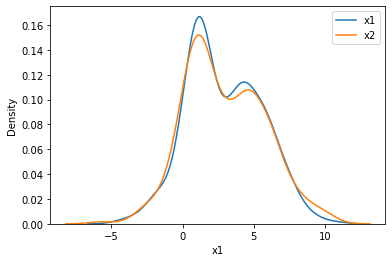

In [28]:
# Dağılımları görselleştir.
for col in ['x1', 'x2']:
    sns.kdeplot(df[col], label=col)
    plt.legend()
    # plt.show()

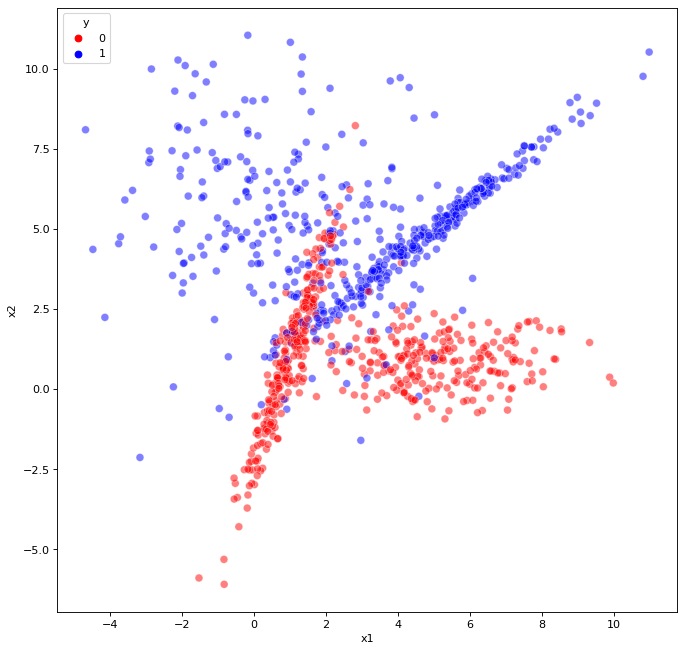

In [29]:
# Verileri görselleştirme
plt.figure(figsize=(10,10), dpi=80)
sns.scatterplot(data = df, x='x1', y='x2', hue='y', s=50,
                palette=['red', 'blue'], legend='full',
                alpha=0.5)
plt.show()

<AxesSubplot:xlabel='x1', ylabel='x2'>

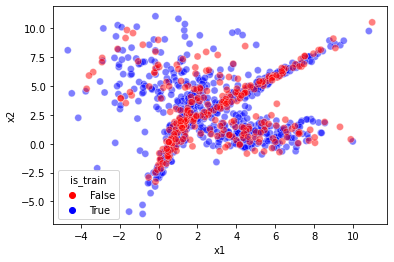

In [30]:
# Train ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'],
                                                    test_size=0.3,
                                                    random_state=42)

# Scatter plot üzerinde train ve test setleri.
X_train['is_train'] = True
X_test['is_train'] = False

df_merged = pd.concat([X_train, X_test])
sns.scatterplot(data = df_merged, x='x1', y='x2', hue='is_train', s=50,
                palette=['red', 'blue'], legend='full',
                alpha=0.5)

In [31]:
def fit_and_evaluate_lr(X_train, 
                        y_train,
                        X_test,
                        y_test,
                        show_report = False):
    logreg = LogisticRegression()

    # Modeli eğit.
    logreg.fit(X_train, y_train)

    # Train ve Test setindeki accuracy değerlerini yazdırır.
    for features, labels in zip([X_train, X_test], [y_train, y_test]):
        print('Set: {}, modelin accuracy (doğruluk) değeri {:.2f}%.'.format(
            'Train' if features is X_train else 'Test',
            100 * logreg.score(features, labels)))
    
    if show_report:
        # Test setinin sınıflarını tahmin et.
        y_pred = logreg.predict(X_test)

        # CM ve heatmap oluştur.
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.xlabel('Tahmin Edilen')
        plt.ylabel('Gerçek Değer')
        plt.show()
        print(classification_report(y_test, y_pred, digits = 4))
        print('Recall:', recall_score(y_test, y_pred, average = 'macro'))
        print('Precision:', precision_score(y_test, y_pred, average = 'macro'))
    return logreg

In [32]:
def generate_cm_report(model, threshold, y_probas, y_test):
    y_pred_threshold = (y_probas[:, 1] > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_threshold)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek Değer')
    plt.show()
    print(classification_report(y_test, y_pred_threshold))

In [33]:
# Log.reg modeli eğit.
logreg = fit_and_evaluate_lr(X_train, y_train, X_test, y_test)

Set: Train, modelin accuracy (doğruluk) değeri 86.14%.
Set: Test, modelin accuracy (doğruluk) değeri 87.33%.


**True Positive:** Model --> Pozitif // Gerçekte --> Pozitif

**True Negative:** Model --> Negatif // Gerçekte --> Negatif

**False Positive:** Model --> Pozitif // Gerçekte --> Negatif

**False Negative:** Model --> Negatif // Gerçekte --> Pozitif

* By Dennis T, Confusion Matrix Visualization.
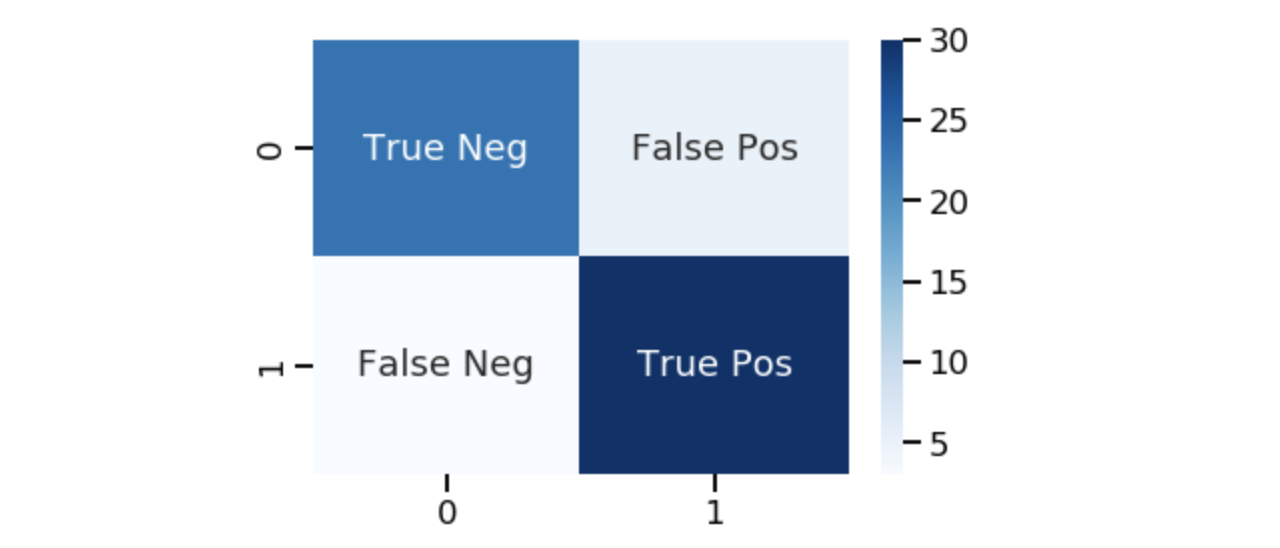

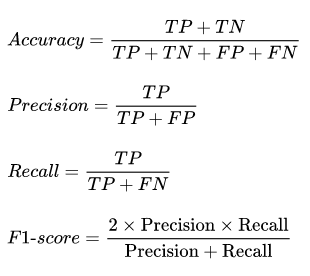

**Recall:** Gerçekte sınıf 1 olanlardan kaç tanesi bulduğumuzun oranı. (Modelimizin gerçekten sınıf 1 olanları bulma oranı)


**Precision:** Sınıf 1 olarak tahmin ettiklerimin, gerçekte kaç tanesinin sınıf 1 olmasının oranı.

Set: Train, modelin accuracy (doğruluk) değeri 86.14%.
Set: Test, modelin accuracy (doğruluk) değeri 87.33%.


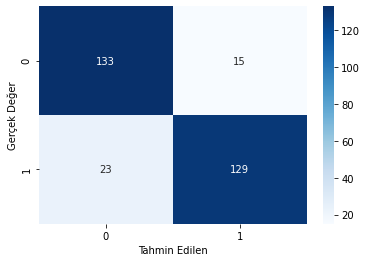

              precision    recall  f1-score   support

           0     0.8526    0.8986    0.8750       148
           1     0.8958    0.8487    0.8716       152

    accuracy                         0.8733       300
   macro avg     0.8742    0.8737    0.8733       300
weighted avg     0.8745    0.8733    0.8733       300

Recall: 0.8736664295874823
Precision: 0.874198717948718


In [34]:
logreg = fit_and_evaluate_lr(X_train, y_train, X_test, y_test,
                            show_report=True)

In [35]:
# Her sınıfın olasılığını tahmin et.
y_proba = logreg.predict_proba(X_test)
y_proba

array([[9.85668336e-01, 1.43316642e-02],
       [1.09536304e-02, 9.89046370e-01],
       [2.03300027e-01, 7.96699973e-01],
       [5.40327878e-01, 4.59672122e-01],
       [9.15314131e-01, 8.46858693e-02],
       [6.49876699e-01, 3.50123301e-01],
       [6.56136041e-02, 9.34386396e-01],
       [1.00021724e-01, 8.99978276e-01],
       [8.28866270e-01, 1.71133730e-01],
       [1.33423173e-01, 8.66576827e-01],
       [4.08738556e-02, 9.59126144e-01],
       [9.72954949e-01, 2.70450507e-02],
       [4.82788167e-01, 5.17211833e-01],
       [6.54374511e-02, 9.34562549e-01],
       [4.07746104e-03, 9.95922539e-01],
       [5.23842634e-02, 9.47615737e-01],
       [8.02820724e-02, 9.19717928e-01],
       [4.69472598e-01, 5.30527402e-01],
       [7.05481045e-01, 2.94518955e-01],
       [8.59038175e-01, 1.40961825e-01],
       [3.96339788e-02, 9.60366021e-01],
       [1.95599623e-02, 9.80440038e-01],
       [1.73298617e-02, 9.82670138e-01],
       [3.32338809e-01, 6.67661191e-01],
       [4.421935

In [61]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [36]:
scores_thresholds = {}
for threshold in np.arange(0, 1, 0.01):
    y_pred_threshold = (y_proba[:, 1] > threshold).astype(int)
    scores_thresholds[threshold] = f1_score(y_test, y_pred_threshold, average = 'macro')

# F1 score'a göre en iyi thresholdu bul.
best_threshold = max(scores_thresholds, key=scores_thresholds.get)
best_threshold

0.37

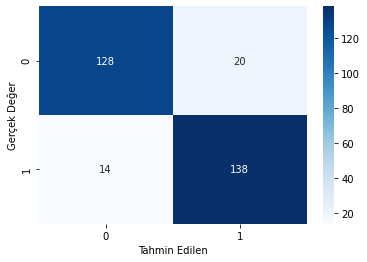

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       148
           1       0.87      0.91      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [37]:
# Bulunan threshold ile raporu yazdır.
generate_cm_report(logreg, best_threshold, y_proba, y_test)

### Sınıf Dengesizliği Olan Veri

In [38]:
# Dengesiz veri seti oluştur.
x, y = create_dataset(n_samples= 10000, is_imbalance=True)
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df

x1        x2  y
0     4.542881  0.475330  0
1     0.415769  2.181779  0
2     2.674981 -0.579459  0
3     2.148360  2.268987  0
4     5.652723  3.641108  0
...        ...       ... ..
9995  5.426363  1.711002  0
9996  5.573150  2.311068  0
9997 -4.528650  3.603343  0
9998  0.609316  1.398261  0
9999  1.939005  0.337836  0

[10000 rows x 3 columns]

In [39]:
df.y.value_counts()

0    9862
1     138
Name: y, dtype: int64

In [40]:
# Kendimiz acc. hesaplayalım.
# Bütün hepsine sınıf 0 dersek, accuracy ne olur?
y_pred = np.zeros(len(y))
accuracy = np.mean(y_pred == y)
accuracy*100

98.61999999999999

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['y'])

In [42]:
Counter(y_train), Counter(y_test)

(Counter({0: 6903, 1: 97}), Counter({0: 2959, 1: 41}))

Set: Train, modelin accuracy (doğruluk) değeri 98.56%.
Set: Test, modelin accuracy (doğruluk) değeri 98.67%.


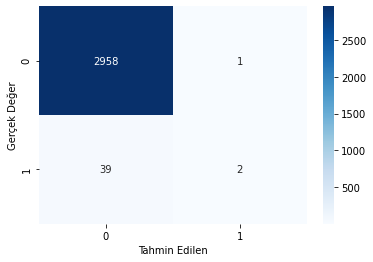

              precision    recall  f1-score   support

           0     0.9870    0.9997    0.9933      2959
           1     0.6667    0.0488    0.0909        41

    accuracy                         0.9867      3000
   macro avg     0.8268    0.5242    0.5421      3000
weighted avg     0.9826    0.9867    0.9810      3000

Recall: 0.5242212678970318
Precision: 0.8268268268268268


In [43]:
logreg = fit_and_evaluate_lr(X_train, y_train, X_test, y_test,
                            show_report = True)

In [44]:
# Predict probabilities of the test set and try different thresholds.
y_proba = logreg.predict_proba(X_test)
y_proba

array([[0.99716928, 0.00283072],
       [0.9884754 , 0.0115246 ],
       [0.98927938, 0.01072062],
       ...,
       [0.97955134, 0.02044866],
       [0.98589796, 0.01410204],
       [0.99284869, 0.00715131]])

In [45]:
scores_thresholds = {}
for threshold in np.arange(0, 1, 0.01):
    y_pred_threshold = (y_proba[:, 1] > threshold).astype(int)
    scores_thresholds[threshold] = f1_score(y_test, y_pred_threshold, average = 'macro')

# en iyi F1 Score veren threshold.
best_threshold = max(scores_thresholds, key=scores_thresholds.get)
best_threshold

0.11

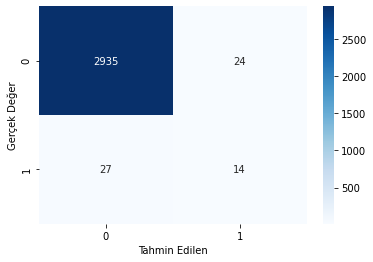

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2959
           1       0.37      0.34      0.35        41

    accuracy                           0.98      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.98      0.98      0.98      3000



In [46]:
# Classification report w/en iyi threshold.
generate_cm_report(logreg, best_threshold, y_proba, y_test)

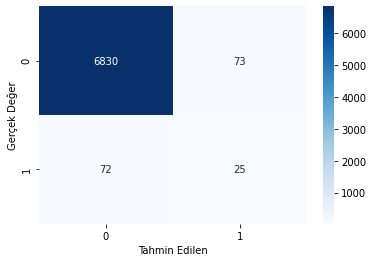

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6903
           1       0.26      0.26      0.26        97

    accuracy                           0.98      7000
   macro avg       0.62      0.62      0.62      7000
weighted avg       0.98      0.98      0.98      7000



In [47]:
generate_cm_report(logreg, best_threshold, logreg.predict_proba(X_train), y_train)

## PCA - Principal Component Analysis
PCA, verilerin boyutsallığını azaltmak için kullanılan istatistiksel bir tekniktir. Mümkün olduğu kadar orijinal bilgiyi korurken verileri daha düşük boyutlu bir alana dönüştürmek için kullanılan bir araçtır.

### Varyans
Her özelliğin bir varyans değeri vardır. Bu değer, o spesifik özelliğin ne kadar değiştiğini gösterir gibi düşünebiliriz. Örnek verecek olursak, bir kolonda $x1$ adı altında bir özellik olsun ve değerleri:
 * $1, 1, 1, 1, 1$ ve
 * $1, 2, 3, 4, 5$ olsun.

Hepsi $1, 1, 1, 1, 1$ olursa, varyans sıfır olur. Bu da demektir ki, ML modelimizde bu özelliği kullanmak bize bir şey kazandırmayacaktır çünkü her satır için bu değer aynıdır. 

Veriden bir şeyler öğrenmemiz için varyansın sıfır olmaması gerekir. Yani varyansı yüksek veriyi daha çok bilgi içeriyor gibi düşünebiliriz.

### Principal Component Nedir?
Artık varyansı bildiğimize göre, varyansı çok daha iyi açıklayabilecek yeni bir dönüştürülmüş özellik kümesi bulmamız gerekiyor. Orijinal 100 öznitelik yani özelliğimiz olduğunu varsayalım.

Tüm varyansı **olabildiğince** korumak adına 100 tane özelliğin lineer kombinasyonlarını kullanarak, onları farklı özelliklere dönüştürmemiz gerekiyor. Bu dönüştürülmüş özelliklere **Principal Component** adı verilir.

**Principal Component** diye adlandırdığımız özelliklerin artık orijinal özelliklerle bir ilgisi yoktur. Bu dönüştürme sonucu, 100 tane özellikten 100 tane **principal component** elde edeceğiz. 

PCA'de yeni oluşturulmuş (dönüştürülmüş) özellik setinde bulunan **principal component'ların** birincisi en yüksek varyansa sahip olacak. Bunu biraz daha açmak gerekirse:

    Örneğin, ilk **principal component**, verilerdeki toplam varyansın %80'ini açıklıyorsa, 2. özellik toplam varyansın %15'ini açıklayabilir. Yani sadece 2 tane **principal component** ile açıklanan varyansın %97'sine sahip olabiliriz.
    
* Detaylı olarak incelemek isteyen `Singular Value Decomposition` konusuna bakabilir.

In [48]:
# Hazır veriyi yükle
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [49]:
df.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

PCA'den önce `standardizasyon` gerçekleştirmenin kritik olmasının nedeni, PCA'nın değişkenlerin varyansları konusunda oldukça hassas olmasıdır. Yani, özelliklerin değerleri arasında büyük farklar varsa, büyük aralıklara sahip olan değişkenler, küçük aralıklara sahip olanlardan daha baskın olacaktır.
* Örneğin, 500 ile 1000 arasında değişen bir değişken, -1 ile 1 arasında değişen bir değişken üzerinde baskınlık oluşturacaktır. Bu da bias'lı sonuçlara yol açacaktır. Dolayısıyla verileri karşılaştırılabilir ölçeklere dönüştürmek bu sorunu önleyecektir. 

PCA'den beklentimiz, her özelliğin eşit oranda katkı sağlamasıdır.

In [50]:
df = (df - df.mean()) / df.std()
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.280628        2.650542             2.530249       2.215566   
1           -0.486643       -0.023825             0.547662       0.001391   
2            1.052000        1.362280             2.035440       0.938859   
3            3.399917        1.914213             1.450431       2.864862   
4            0.538866        1.369806             1.427237      -0.009552   
..                ...             ...                  ...            ...   
564          0.218868        1.945573             2.318924      -0.312314   
565         -0.017817        0.692434             1.262558      -0.217473   
566         -0.038646        0.046547             0.105684      -0.808406   
567          3.269267        3.294046             2.656528       2.135315   
568         -1.149741       -1.113893            -1.260710      -0.819349   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                  2.253764  ...      -1.358098         2.301575    1.999478   
1                 -0.867889  ...      -0.368879         1.533776    1.888827   
2                 -0.397658  ...      -0.023953         1.346291    1.455004   
3                  4.906602  ...       0.133866        -0.249720   -0.549538   
4                 -0.561956  ...      -1.465481         1.337363    1.219651   
..                      ...  ...            ...              ...         ...   
564               -0.930209  ...       0.117596         1.751022    2.013529   
565               -1.057681  ...       2.045599         1.420690    1.493644   
566               -0.894800  ...       1.373645         0.578492    0.427529   
567                1.042778  ...       2.235958         2.301575    1.651717   
568               -0.560539  ...       0.763518        -1.431475   -1.074867   

     worst smoothness  worst compactness  worst concavity  \
0            1.306537           2.614365         2.107672   
1           -0.375282          -0.430066        -0.146620   
2            0.526944           1.081980         0.854222   
3            3.391291           3.889975         1.987839   
4            0.220362          -0.313119         0.612640   
..                ...                ...              ...   
564          0.378033          -0.273077         0.663928   
565         -0.690623          -0.394473         0.236365   
566         -0.808876           0.350427         0.326479   
567          1.429169           3.901415         3.194794   
568         -1.857384          -1.206491        -1.304683   

     worst concave points  worst symmetry  worst fractal dimension    target  
0                2.294058        2.748204                 1.935312 -1.296535  
1                1.086129       -0.243675                 0.280943 -1.296535  
2                1.953282        1.151242                 0.201214 -1.296535  
3                2.173873        6.040726                 4.930672 -1.296535  
4                0.728618       -0.867590             

In [51]:
df.describe().T

count          mean  std       min       25%  \
mean radius              569.0 -3.159355e-15  1.0 -2.027864 -0.688779   
mean texture             569.0 -6.549730e-15  1.0 -2.227289 -0.725325   
mean perimeter           569.0 -6.993039e-16  1.0 -1.982759 -0.691347   
mean area                569.0 -8.491548e-16  1.0 -1.453164 -0.666609   
mean smoothness          569.0  6.093934e-15  1.0 -3.109349 -0.710338   
mean compactness         569.0 -1.111394e-15  1.0 -1.608721 -0.746429   
mean concavity           569.0 -3.121893e-16  1.0 -1.113893 -0.743094   
mean concave points      569.0  1.023981e-15  1.0 -1.260710 -0.737295   
mean symmetry            569.0 -1.848160e-15  1.0 -2.741705 -0.702621   
mean fractal dimension   569.0 -1.461046e-15  1.0 -1.818265 -0.722004   
radius error             569.0 -9.615429e-16  1.0 -1.058992 -0.623022   
texture error            569.0 -9.115926e-16  1.0 -1.552898 -0.694198   
perimeter error          569.0  1.848160e-15  1.0 -1.043131 -0.623220   
area error               569.0 -7.617418e-16  1.0 -0.737180 -0.494319   
smoothness error         569.0 -7.430104e-16  1.0 -1.774504 -0.623470   
compactness error        569.0 -3.933585e-16  1.0 -1.296957 -0.692317   
concavity error          569.0  8.616423e-16  1.0 -1.056571 -0.556671   
concave points error     569.0 -2.747265e-16  1.0 -1.911765 -0.673897   
symmetry error           569.0 -3.309206e-16  1.0 -1.531542 -0.651108   
fractal dimension error  569.0 -3.121893e-16  1.0 -1.096004 -0.584604   
worst radius             569.0 -2.285225e-15  1.0 -1.725382 -0.674328   
worst texture            569.0  1.735772e-15  1.0 -2.222039 -0.747971   
worst perimeter          569.0 -1.223782e-15  1.0 -1.691872 -0.688972   
worst area               569.0  6.118909e-16  1.0 -1.221348 -0.641571   
worst smoothness         569.0 -5.082441e-15  1.0 -2.680337 -0.690623   
worst compactness        569.0 -2.135374e-15  1.0 -1.442609 -0.680485   
worst concavity          569.0  6.243785e-16  1.0 -1.304683 -0.755849   
worst concave points     569.0 -1.998011e-16  1.0 -1.743529 -0.755735   
worst symmetry           569.0 -2.422589e-15  1.0 -2.159060 -0.641299   
worst fractal dimension  569.0  2.510002e-15  1.0 -1.600431 -0.691303   
target                   569.0 -7.492542e-17  1.0 -1.296535 -1.296535   

                              50%       75%        max  
mean radius             -0.214893  0.468980   3.967796  
mean texture            -0.104544  0.583662   4.647799  
mean perimeter          -0.235773  0.499238   3.972634  
mean area               -0.294927  0.363188   5.245913  
mean smoothness         -0.034860  0.635640   4.766717  
mean compactness        -0.221745  0.493423   4.564409  
mean concavity          -0.341939  0.525599   4.239858  
mean concave points     -0.397372  0.646366   3.924477  
mean symmetry           -0.071564  0.530313   4.480808  
mean fractal dimension  -0.178123  0.470569   4.906602  
radius error            -0.291988  0.265866   8.899079  
texture error           -0.197324  0.466142   6.649429  
perimeter error         -0.286400  0.242817   9.453668  
area error              -0.347477  0.106679  11.032135  
smoothness error        -0.220142  0.368031   8.022940  
compactness error       -0.280773  0.389312   6.138081  
concavity error         -0.198890  0.336456  12.062067  
concave points error    -0.140372  0.472241   6.643755  
symmetry error          -0.219238  0.355380   7.065700  
fractal dimension error -0.229738  0.288388   9.842932  
worst radius            -0.268803  0.521557   4.090590  
worst texture           -0.043477  0.657762   3.882489  
worst perimeter         -0.285729  0.539804   4.283568  
worst area              -0.340881  0.357275   5.924959  
worst smoothness        -0.046802  0.597020   3.951897  
worst compactness       -0.269264  0.539194   5.108382  
worst concavity         -0.218040  0.530674   4.696536  
worst concave points    -0.223272  0.711884   2.683516  
worst symmetry          -0.127297  

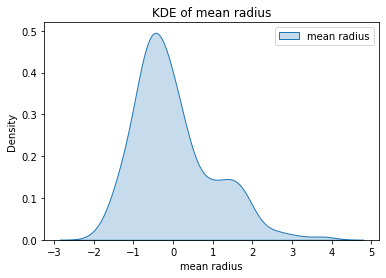

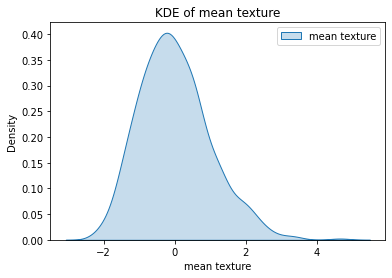

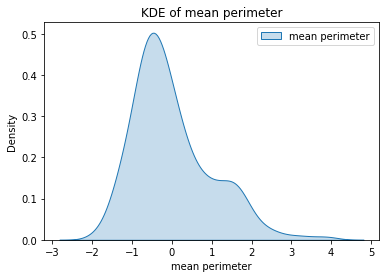

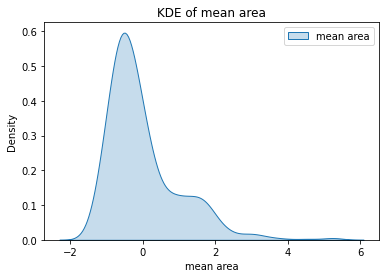

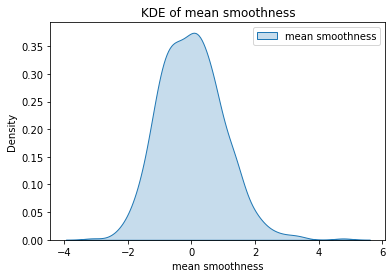

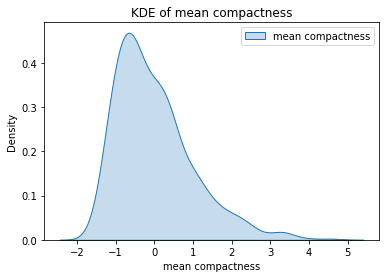

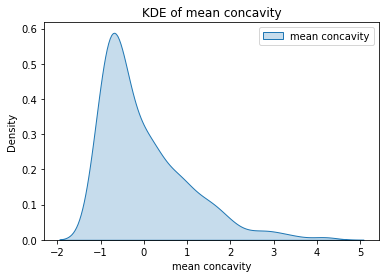

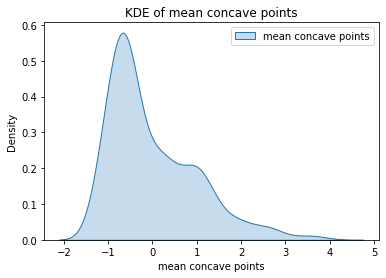

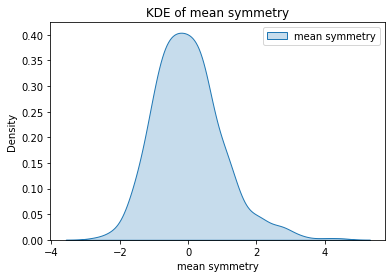

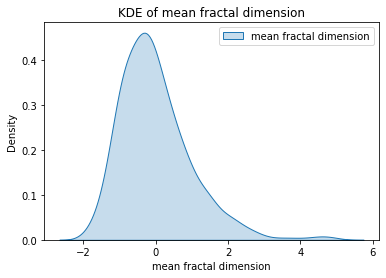

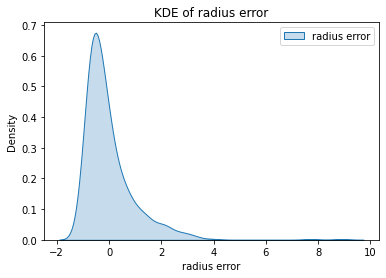

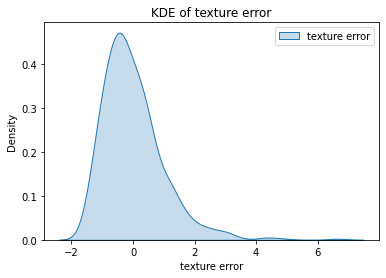

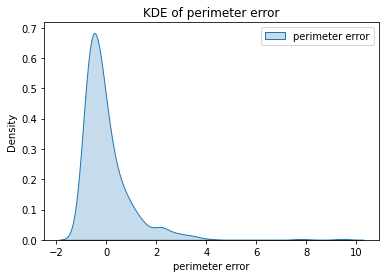

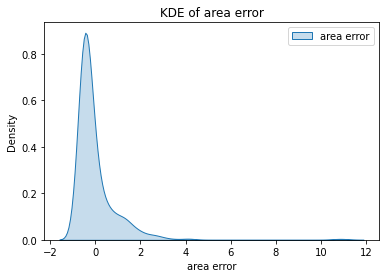

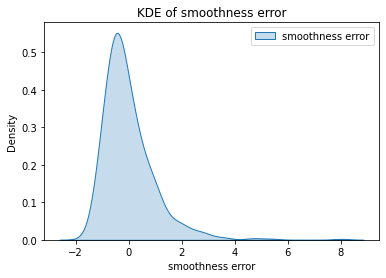

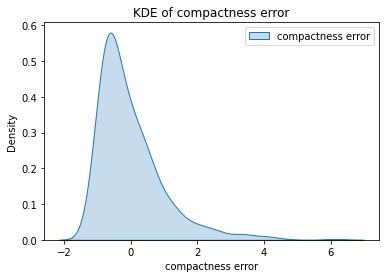

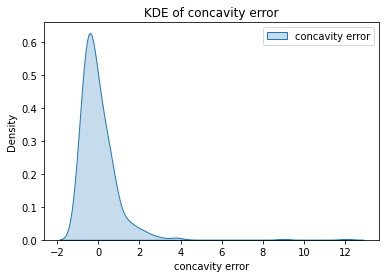

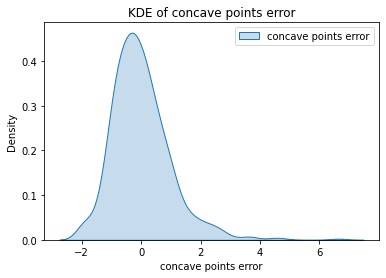

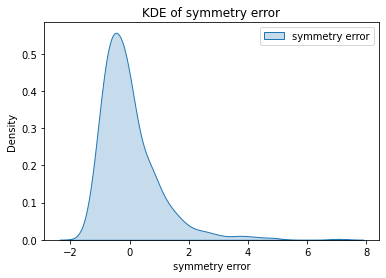

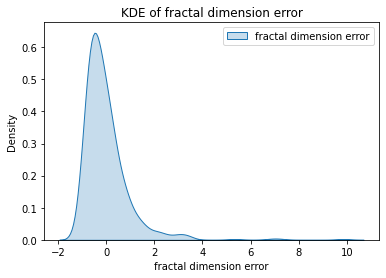

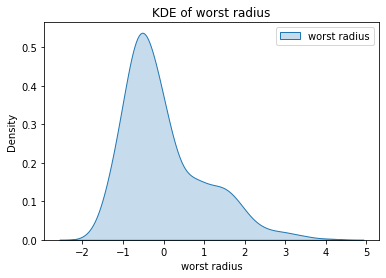

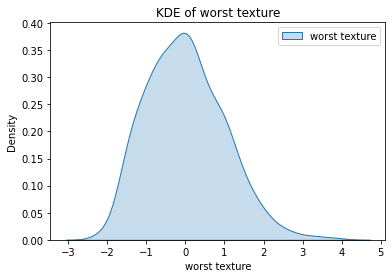

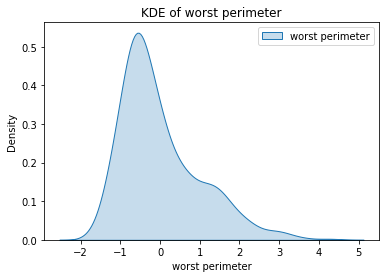

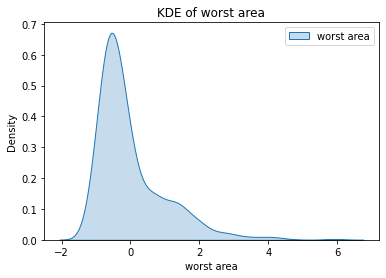

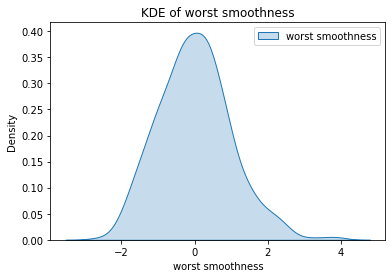

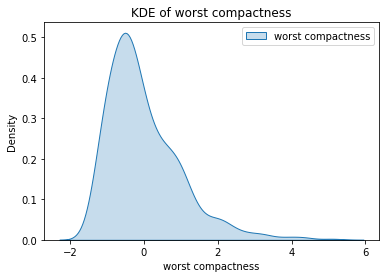

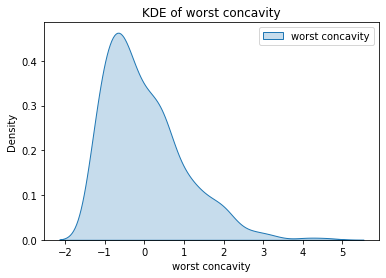

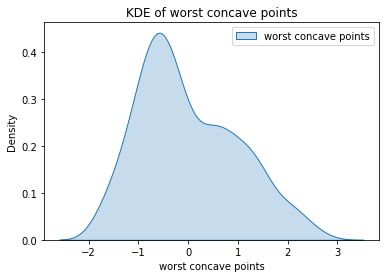

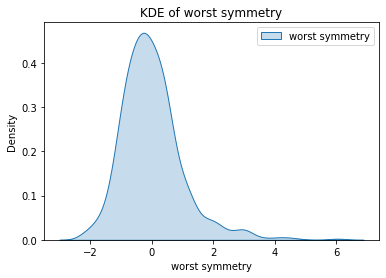

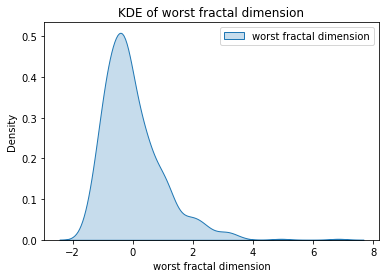

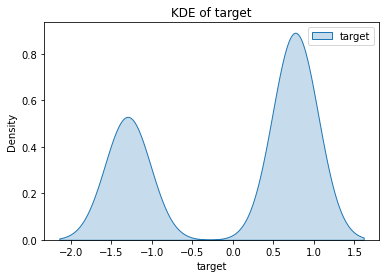

In [52]:
# Dağılımları KDE-Plot ile gösterelim.
for col in df.columns:
    sns.kdeplot(df[col], shade=True, label=col)
    plt.legend()
    plt.title('KDE of {}'.format(col))
    plt.show()

In [53]:
# PCA uygula.
pca = PCA(n_components=3)
pca.fit(df)
X_pca = pca.transform(df)
X_pca;

In [54]:
# İlk 3 bileşenin plotly ile görselleştirilmesi.
trace = go.Scatter3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                     mode='markers', marker=dict(size=6,
                                                 color=df['target'],
                                                 colorscale='Viridis',
                                                 opacity=0.8))
data = [trace]
iplot(data)

In [55]:
pca.explained_variance_ratio_

array([0.44896035, 0.18472104, 0.09183385])

In [56]:
# Peki biz verimizi ne kadar açıklayabildik?
sum(pca.explained_variance_ratio_)

0.725515245245943

In [57]:
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2', 'x3'])
df_pca

x1         x2        x3
0     9.217660   2.114335 -0.947276
1     2.653467  -3.781449 -0.502383
2     5.887312  -1.004695 -0.486721
3     7.129128  10.309645 -3.336565
4     4.125792  -1.903904  1.452722
..         ...        ...       ...
564   6.588186  -3.451910  2.568616
565   4.021295  -3.552880  2.045573
566   1.528732  -1.957149  0.465309
567  10.395861   1.847452 -1.777763
568  -5.500022  -0.765675  1.367420

[569 rows x 3 columns]

In [58]:
np.mean(df_pca['x1'] * df_pca['x2'])

7.992044831045063e-16

In [59]:
# Reduce the dimensionality of the dataset to 2 using PCA.
pca = PCA(n_components=2)
pca.fit(df)
X_pca = pca.transform(df)

# Plot the first 2 principal components using Plotly.
trace = go.Scatter(x=X_pca[:, 0], y=X_pca[:, 1],
                   mode='markers', marker=dict(size=10,
                                               color=df['target'],
                                               colorscale='Viridis',
                                               opacity=0.8))
data = [trace]
iplot(data)

In [60]:
# Peki biz verimizi ne kadar açıklayabildik?
sum(pca.explained_variance_ratio_)

0.6336813909409855